In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as numpy
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

In [3]:
df = pd.read_csv('../../../../Datasets/ML/student_result.csv')

In [4]:
df.head()

,Study_Hours,Attendance,Pass_Fail
0,3.745401,51.107976,0
1,9.507143,72.514057,1
2,7.319939,92.376750,0
3,5.986585,83.933493,1
4,1.560186,88.393669,0


In [5]:
sc = StandardScaler()

In [6]:
X = df.drop('Pass_Fail', axis = 1)

In [7]:
y = df['Pass_Fail']

In [8]:
X = sc.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 42)

In [10]:
model = {
    'linear': SVC(kernel = 'linear', C = 1),
    'poly': SVC(kernel = 'poly', C = 1, degree = 3),
    'rbf': SVC(kernel = 'rbf', C = 1, gamma = 1)
}

In [11]:
model['linear'].fit(X_train, y_train)
model['poly'].fit(X_train, y_train)
model['rbf'].fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
print(model['linear'].score(X_test, y_test))
print(model['poly'].score(X_test, y_test))
print(model['rbf'].score(X_test, y_test))

0.83
0.75
0.77


In [13]:
inp = sc.transform([[8, 90]])
model['rbf'].predict(inp)

c:\Users\HP\Desktop\DATA\QUASTECH\ds-notes\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [14]:
import pickle

for m, v in model.items():
    model_filename = f'../../../../models/student_result/student_svm_{m}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(v, file)

scaler_filename = '../../../../models/student_result/student_scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(sc, file)

In [15]:
model_filename = '../../../../models/student_result/student_result_linear.pkl'
with open(model_filename, 'rb') as file:
    m = pickle.load(file)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))

    # Scatter points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30, edgecolors="k")
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid
    xx = np.linspace(xlim[0], xlim[1], 300)
    yy = np.linspace(ylim[0], ylim[1], 300)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # decision function
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary
    ax.contour(XX, YY, Z,
                colors='k',
                levels=[-1, 0, 1],
                alpha=0.7,
                linestyles=['--', '-', '--'])
    
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=120, linewidth=1, facecolors='none', edgecolors='k')

    plt.title(title)
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.show()

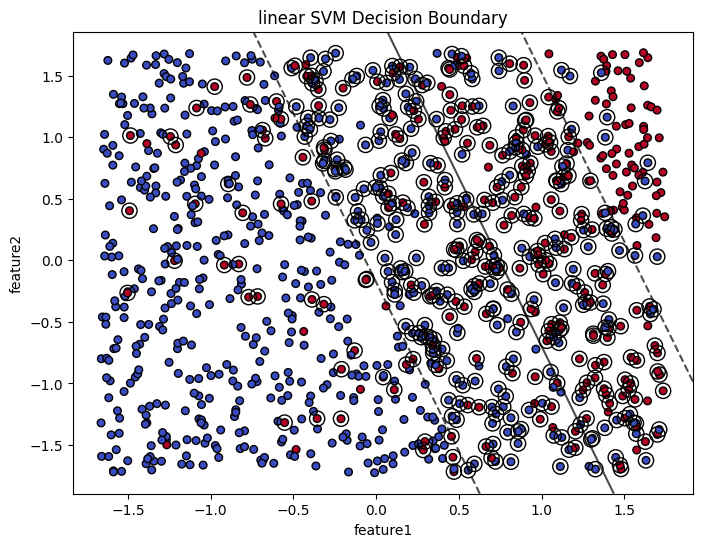

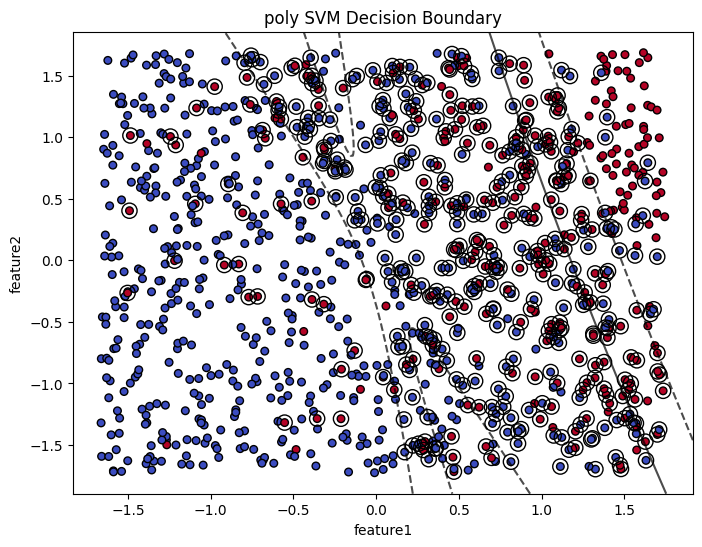

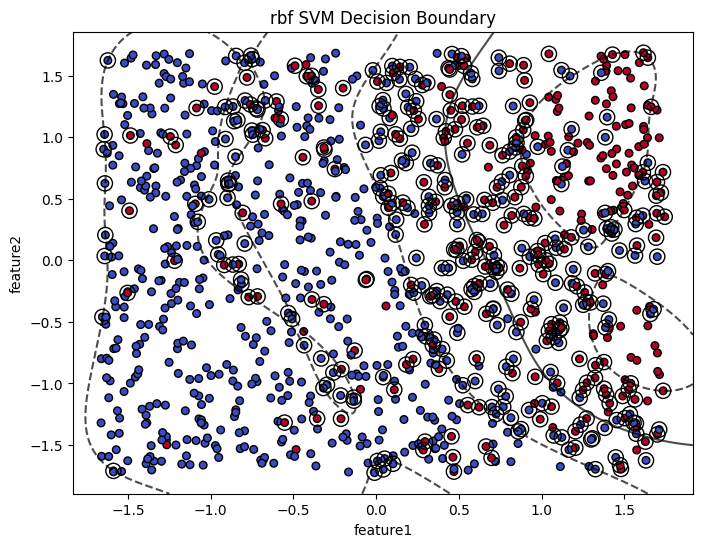

In [20]:
for name, m in model.items():
    plot_decision_boundary(m, X, y, f"{name} SVM Decision Boundary")